In [11]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch
import random
import pickle
import ast

In [ ]:
# Load the .pkl file
with open("eternabench_ribonanzanet_chemmapping_preds.pkl", "rb") as f:
    loaded_preds = pickle.load(f)

print("Loaded predictions:", loaded_preds)

In [9]:
loaded_preds[0][0] #sequence 0, nucleotide 0, both 2A3 and DMS reactivities

array([0.05328609, 0.00823471], dtype=float32)

In [ ]:
loaded_preds[0] #sequence 0, all nucleotide reactivities for both 2A3 and DMS

In [16]:
# Extract reactivity values
two_a3_vector_list = [tensor[:, 0].tolist() for tensor in loaded_preds]  # First reactivity values for each RNA sequence
dms_vector_list = [tensor[:, 1].tolist() for tensor in loaded_preds]  # Second reactivity values for each RNA sequence


In [21]:
raw_data=pd.read_json("EternaBench_ChemMapping_Filtered_10Jul2021.json.zip")

raw_data['reactivity'] = raw_data['reactivity'].apply(lambda x: [float(i) for i in x])

In [17]:
for i in range(len(raw_data)):
  idx = raw_data.iloc[i]['seqpos'][-1] + 1
  two_a3_vector_list[i] = two_a3_vector_list[i][0:idx]

In [19]:
for i in range(len(raw_data)):
  idx = raw_data.iloc[i]['seqpos'][-1] + 1
  dms_vector_list[i] = dms_vector_list[i][0:idx]

In [ ]:
for i in two_a3_vector_list:
  print(len(i))

In [ ]:
print(two_a3_vector_list[23])

In [27]:
df2 = pd.read_json('EternaBench_ChemMapping_Example_PunpVectors_Round1_with_RibonanzaNet_ChemMapping.json')
# Optionally convert inner lists to float (if they all are float-like strings)
#df2['reactivity'] = df2['reactivity'].apply(ast.literal_eval)
df2['reactivity'] = df2['reactivity'].apply(lambda x: [float(i) for i in x])

In [28]:
df2.columns

Index(['EteRNA', 'ID', 'MAPseq', 'Part 2', 'chemical', 'construct',
       'design_name', 'errors', 'filename', 'modifier', 'passed_CDHIT_filter',
       'processing', 'project_name', 'reactivity', 'seqpos', 'sequence',
       'signal_to_noise', 'structure', 'temperature', 'full_p_vienna_2',
       'p_vienna_2', 'full_p_vienna_2_nodangles', 'p_vienna_2_nodangles',
       'full_p_vienna_2_60C', 'p_vienna_2_60C', 'full_p_vienna_1',
       'p_vienna_1', 'full_p_nupack_99', 'p_nupack_99',
       'full_p_nupack_99_nodangles', 'p_nupack_99_nodangles',
       'full_p_nupack_95', 'p_nupack_95', 'full_p_nupack_95_nodangles',
       'p_nupack_95_nodangles', 'full_p_rnastructure', 'p_rnastructure',
       'full_p_rnastructure_nocoax', 'p_rnastructure_nocoax',
       'full_p_contrafold_1', 'p_contrafold_1', 'full_p_contrafold_2',
       'p_contrafold_2', 'full_p_contrafold_2_nc', 'p_contrafold_2_nc',
       'full_p_vienna_langdon_pars', 'p_vienna_langdon_pars',
       'full_p_vienna_rnasoft_pars',

In [25]:
choose_index = input('Choose and index in the round 1 pilot data to plot predictions : ')

Choose and index in the round 1 pilot data to plot predictions : 0


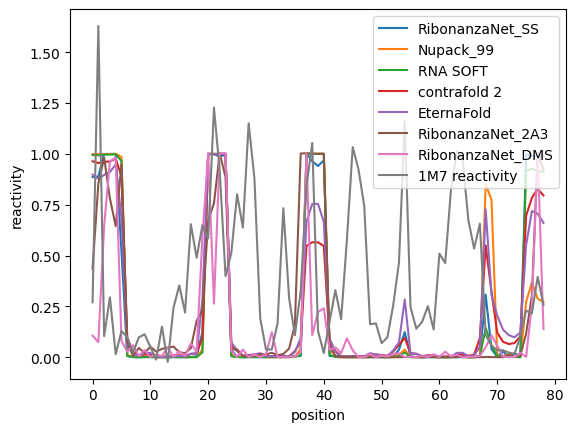

In [31]:
# let's take a look at the predictions
import matplotlib.pyplot as plt
plt.plot(df2.iloc[1]['p_RibonanzaNet_SS'],label='RibonanzaNet_SS')
plt.plot(df2.iloc[1]['p_nupack_99'],label='Nupack_99')
plt.plot(df2.iloc[1]['p_rnasoft_99'], label='RNA SOFT')
plt.plot(df2.iloc[1]['p_contrafold_2'], label='contrafold 2')
plt.plot(df2.iloc[1]['p_eternafold_B'], label='EternaFold')
plt.plot(df2.iloc[1]['p_RibonanzaNet_2A3'],label='RibonanzaNet_2A3')
plt.plot(df2.iloc[1]['p_RibonanzaNet_DMS'],label='RibonanzaNet_DMS')
plt.plot(raw_data.iloc[1]['reactivity'], label = '1M7 reactivity')


plt.xlabel('position')
plt.ylabel('reactivity')
plt.legend()

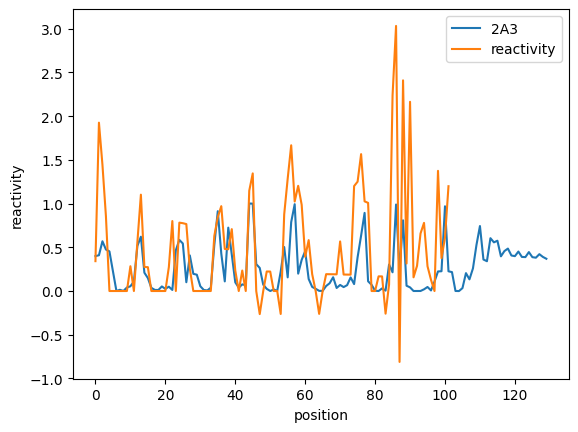

In [30]:
# let's take a look at the predictions
import matplotlib.pyplot as plt
plt.plot(loaded_preds[9000][:,0],label='2A3')
#plt.plot(loaded_preds[0][:,1],label='DMS')
plt.plot(raw_data.iloc[9000]['reactivity'], label = 'reactivity')


plt.xlabel('position')
plt.ylabel('reactivity')
plt.legend()
